In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat/animals/dog/00985-127787239.png
/kaggle/input/dog-vs-cat/animals/dog/00667-3846168829.png
/kaggle/input/dog-vs-cat/animals/dog/00891-3846169053.png
/kaggle/input/dog-vs-cat/animals/dog/00528-3846168690.png
/kaggle/input/dog-vs-cat/animals/dog/00689-3846168851.png
/kaggle/input/dog-vs-cat/animals/dog/00593-3846168755.png
/kaggle/input/dog-vs-cat/animals/dog/00894-3846169056.png
/kaggle/input/dog-vs-cat/animals/dog/00622-3846168784.png
/kaggle/input/dog-vs-cat/animals/dog/00907-3846169069.png
/kaggle/input/dog-vs-cat/animals/dog/00983-127787237.png
/kaggle/input/dog-vs-cat/animals/dog/00817-3846168979.png
/kaggle/input/dog-vs-cat/animals/dog/00576-3846168738.png
/kaggle/input/dog-vs-cat/animals/dog/00620-3846168782.png
/kaggle/input/dog-vs-cat/animals/dog/00940-3846169102.png
/kaggle/input/dog-vs-cat/animals/dog/00931-3846169093.png
/kaggle/input/dog-vs-cat/animals/dog/00904-3846169066.png
/kaggle/input/dog-vs-cat/animals/dog/00996-127787250.png
/kaggle/input/dog

In [2]:
# === Step 1: Import Required Libraries ===
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from shutil import copyfile

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split




2025-08-01 16:59:03.460052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754067543.832135      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754067543.932129      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# === Step 2: Set Random Seed for Reproducibility ===
random.seed(42)

# === Step 3: Load File Paths and Labels ===
original_dir = "/kaggle/input/dog-vs-cat/animals"

data = []
for label in ["cat", "dog"]:
    folder = os.path.join(original_dir, label)
    for fname in os.listdir(folder):
        data.append({
            "filepath": os.path.join(folder, fname),
            "label": 0 if label == "cat" else 1
        })

df = pd.DataFrame(data)
df.head()



filepath  label
0  /kaggle/input/dog-vs-cat/animals/cat/00246-200...      0
1  /kaggle/input/dog-vs-cat/animals/cat/00102-200...      0
2  /kaggle/input/dog-vs-cat/animals/cat/00034-200...      0
3  /kaggle/input/dog-vs-cat/animals/cat/00350-200...      0
4  /kaggle/input/dog-vs-cat/animals/cat/00343-200...      0

In [5]:
# === Step 4: Train/Test Split ===
x_train, x_test, y_train, y_test = train_test_split(df["filepath"], df["label"], test_size=0.2, random_state=42)

train_df = pd.DataFrame({
    "filename": x_train,
    "class": y_train.map({0: "cat", 1: "dog"})
})

test_df = pd.DataFrame({
    "filename": x_test,
    "class": y_test.map({0: "cat", 1: "dog"})
})



In [6]:
# === Step 5: Image Data Generators ===
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filename",
    y_col="class",
    target_size=(256, 256),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="filename",
    y_col="class",
    target_size=(256, 256),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)



Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [21]:
# === Step 6: CNN Model Architecture ===
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))



In [22]:
# === Step 7: Compile the Model ===
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# === Step 8: Add Early Stopping ===
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=4,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


In [24]:
# === Step 9: Train the Model ===
history= model.fit( train_generator, validation_data=test_generator, epochs=50, callbacks=callback )


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 525ms/step - accuracy: 0.5484 - loss: 0.9579 - val_accuracy: 0.7050 - val_loss: 0.6220
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - accuracy: 0.7773 - loss: 0.5570 - val_accuracy: 0.8450 - val_loss: 0.4017
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 472ms/step - accuracy: 0.8861 - loss: 0.3182 - val_accuracy: 0.8600 - val_loss: 0.3204
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 473ms/step - accuracy: 0.9065 - loss: 0.2469 - val_accuracy: 0.8700 - val_loss: 0.2898
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 477ms/step - accuracy: 0.9578 - loss: 0.1430 - val_accuracy: 0.9100 - val_loss: 0.1788
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 481ms/step - accuracy: 0.9783 - loss: 0.0824 - val_accuracy: 0.9050 - val_loss: 0.1852
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 483ms/step - accuracy: 0.9837 - loss: 0.0460 - val_accuracy: 0.9050 - val_loss: 0.2836
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 481ms/step - accuracy: 0.9868 - loss: 0.0321 - val_accu

In [25]:
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to 0 or 1



7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step


In [26]:
# Evaluate model on test data
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.9365 - loss: 0.3136
Test Accuracy: 93.50%


In [27]:
true_labels = test_generator.classes
filepaths = test_generator.filepaths
class_names = list(test_generator.class_indices.keys())  # ['cat', 'dog']


In [29]:
results = []
for i in range(len(filepaths)):
    results.append({
        'filepath': filepaths[i],
        'true_label': true_labels[i],
        'pred_label': pred_labels[i]
    })
random.shuffle(results)

def show_predictions(results, num_images=16):
    plt.figure(figsize=(16, 16))
    for i in range(min(num_images, len(results))):
        img = plt.imread(results[i]['filepath'])
        true = class_names[results[i]['true_label']]
        pred = class_names[results[i]['pred_label']]
        correct = (true == pred)

        plt.subplot(4, 4, i + 1)
        plt.imshow(img)
        plt.axis('off')
        title = f"True: {true}\nPred: {pred}"
        plt.title(title, color='green' if correct else 'red')
    
    plt.tight_layout()
    plt.show()

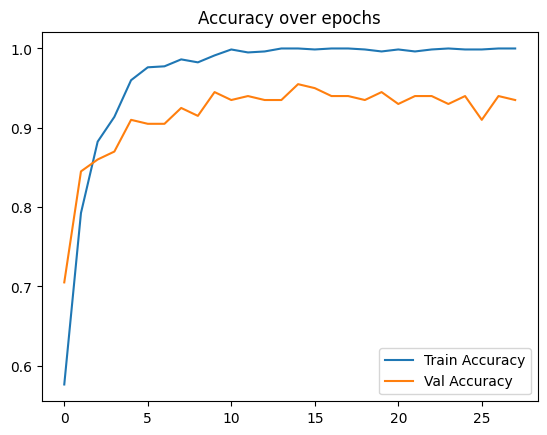

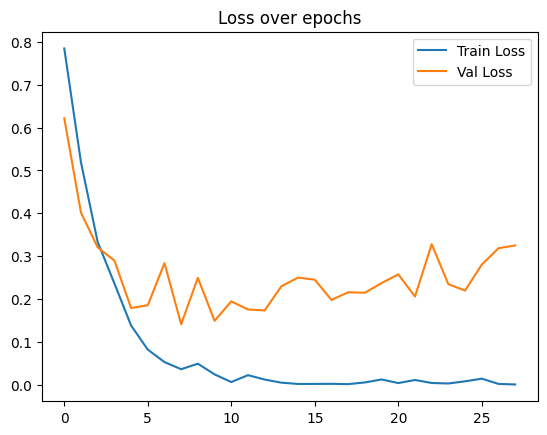

In [31]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

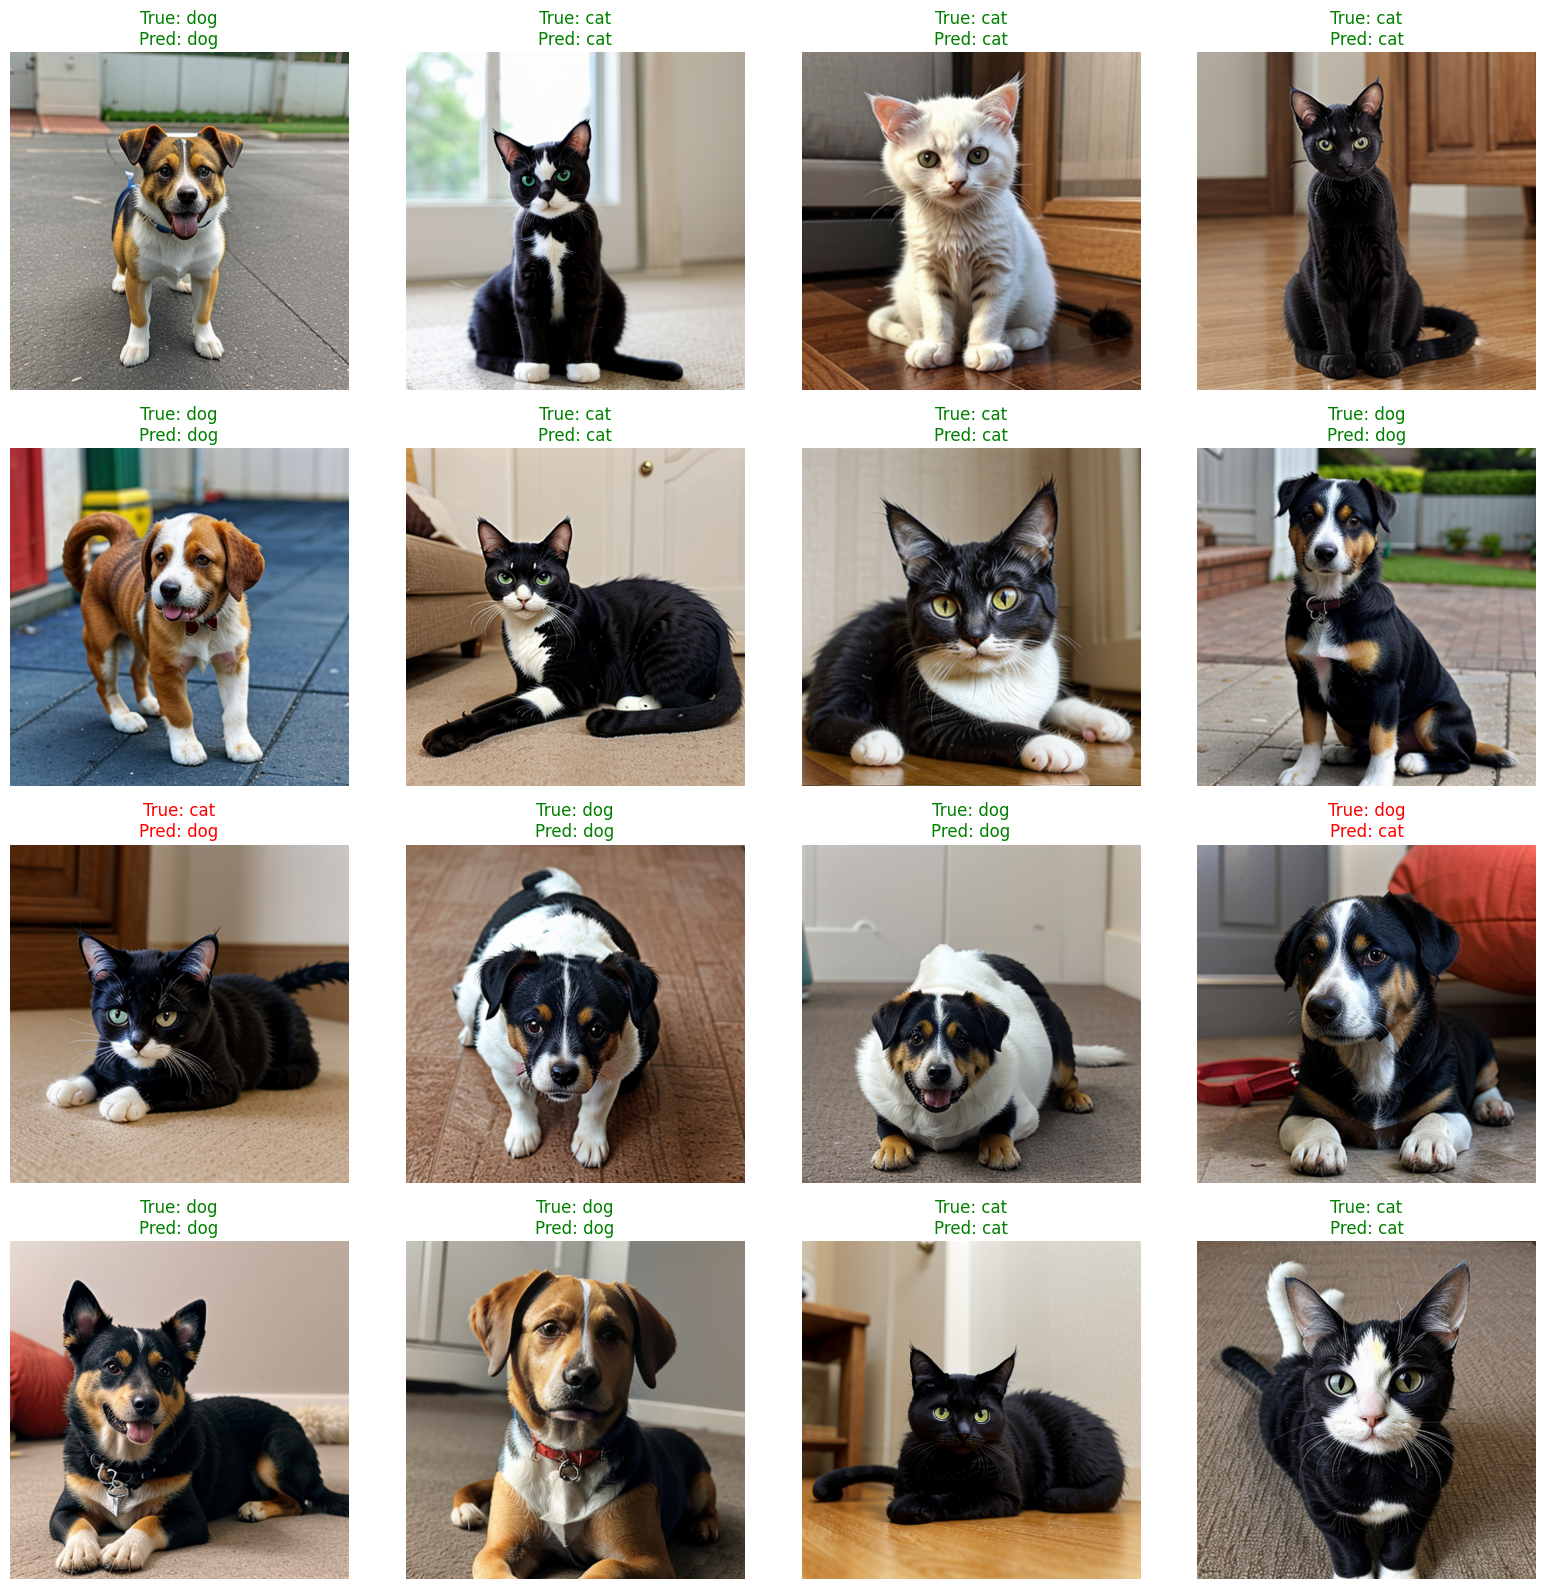

In [30]:
show_predictions(results, num_images=16)